In [ ]:
pip install gapminder


In [ ]:
import gapminder

In [ ]:
from gapminder import gapminder

In [ ]:
from plotnine import *

In [ ]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
type(gapminder)

pandas.core.frame.DataFrame

1D plots: Bar plots for discrete variables

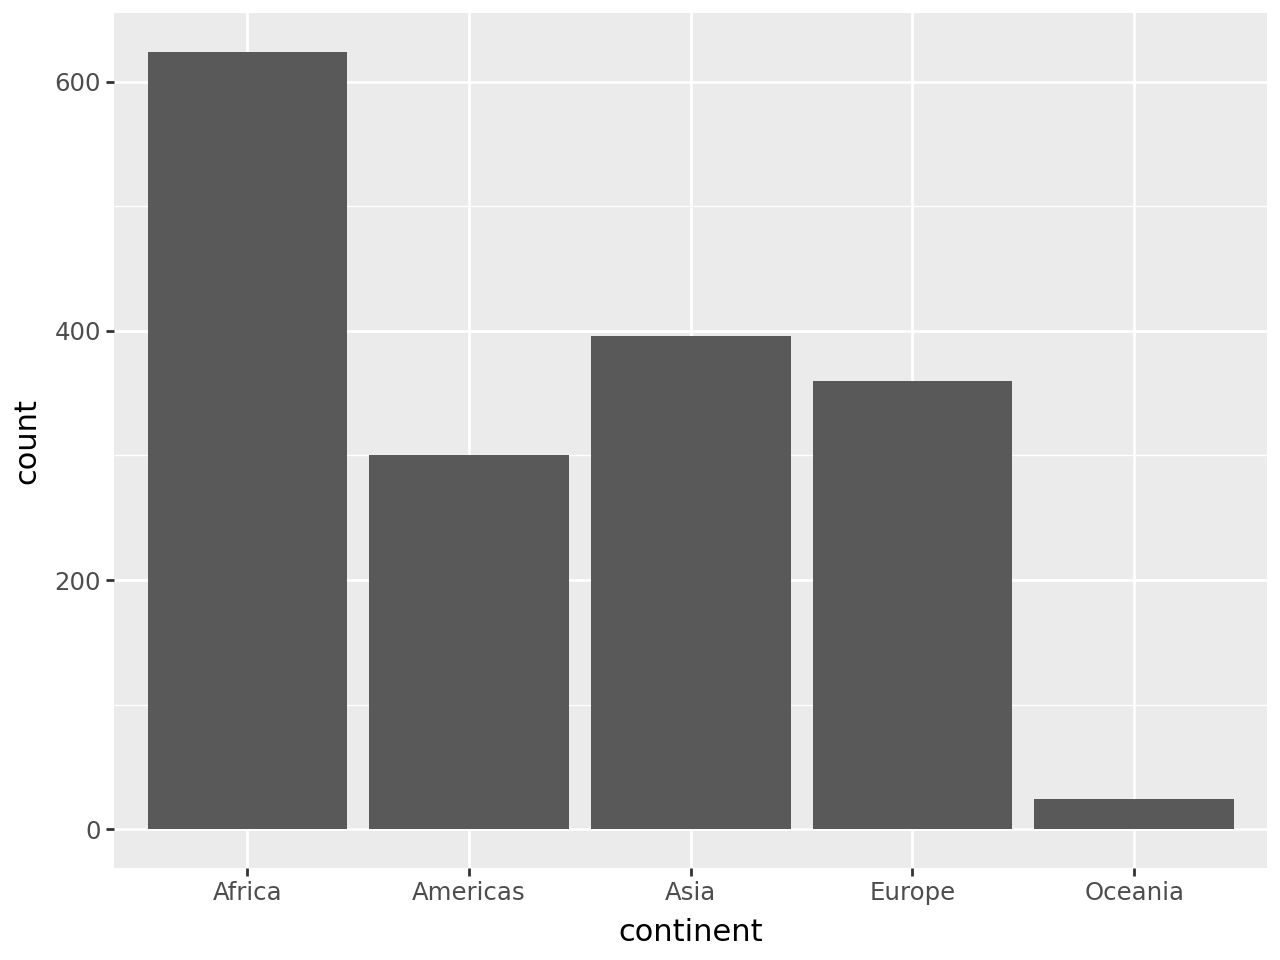

In [ ]:
(
 ggplot(gapminder,aes("continent") )  +
 geom_bar()
)
#distributions of continent

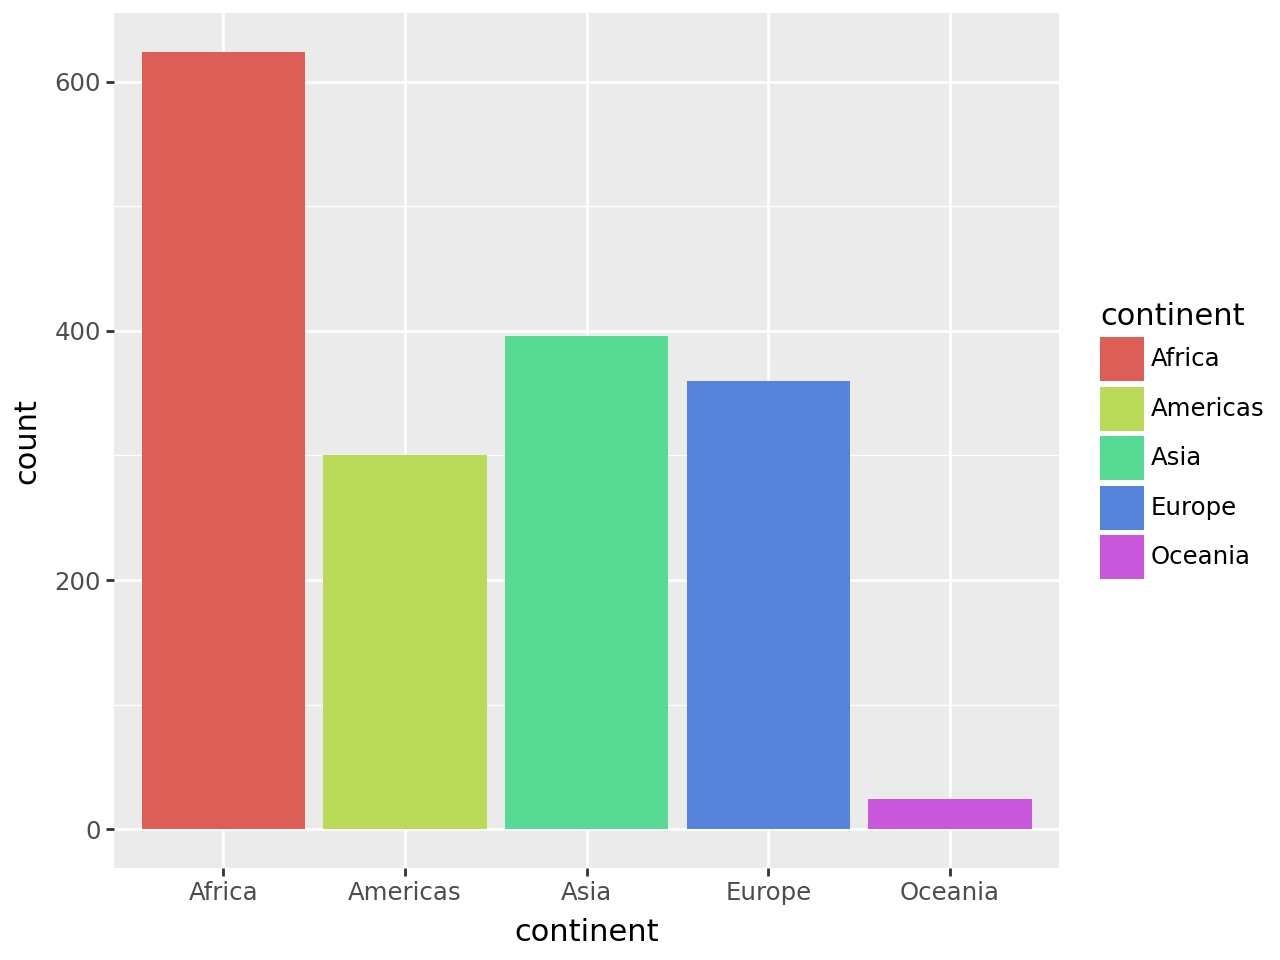

In [ ]:
(
    ggplot(gapminder, aes(x="continent", fill="continent"))
    + geom_bar()
)
#more colorful :)

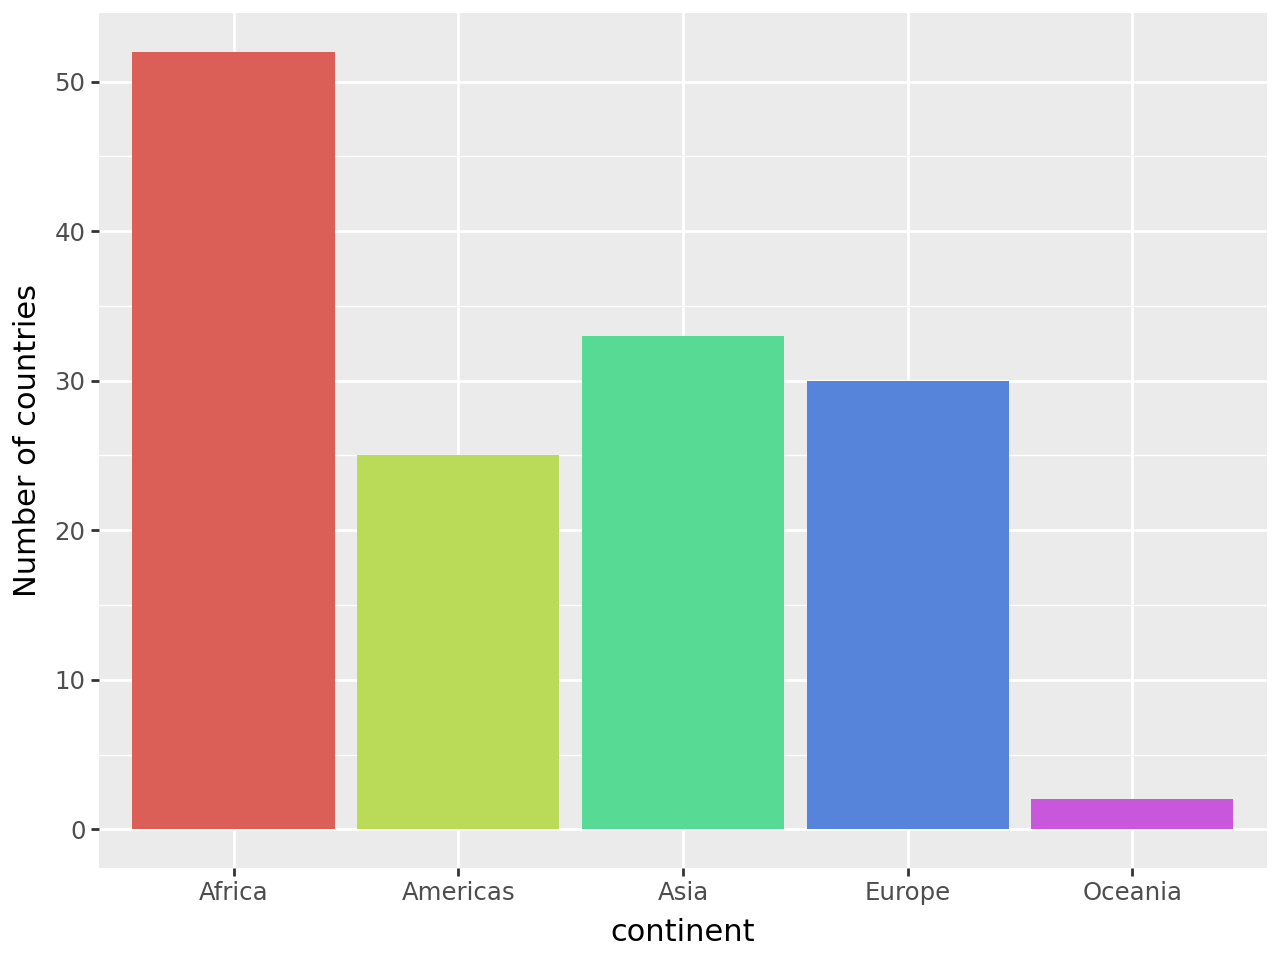

In [ ]:
(
  ggplot(gapminder, aes(x="continent", fill="continent")) +
    geom_bar(aes(y=after_stat('count / 12.0'))) +
    #transform the count to count the nbr of countries
    # There are 12 years of entries
    labs(y="Number of countries") + #add a better label to y axis
    guides(fill=False) #remove the legend (redundance)
)

In [ ]:
len(gapminder['year'].unique())

12

In [ ]:
mybar = (
  ggplot(gapminder, aes(x="continent", fill="continent")) +
    geom_bar(aes(y=after_stat('count / 12.0'))) +
    labs(y="Number of countries") +
    guides(fill=False) # record a plot for future use
)

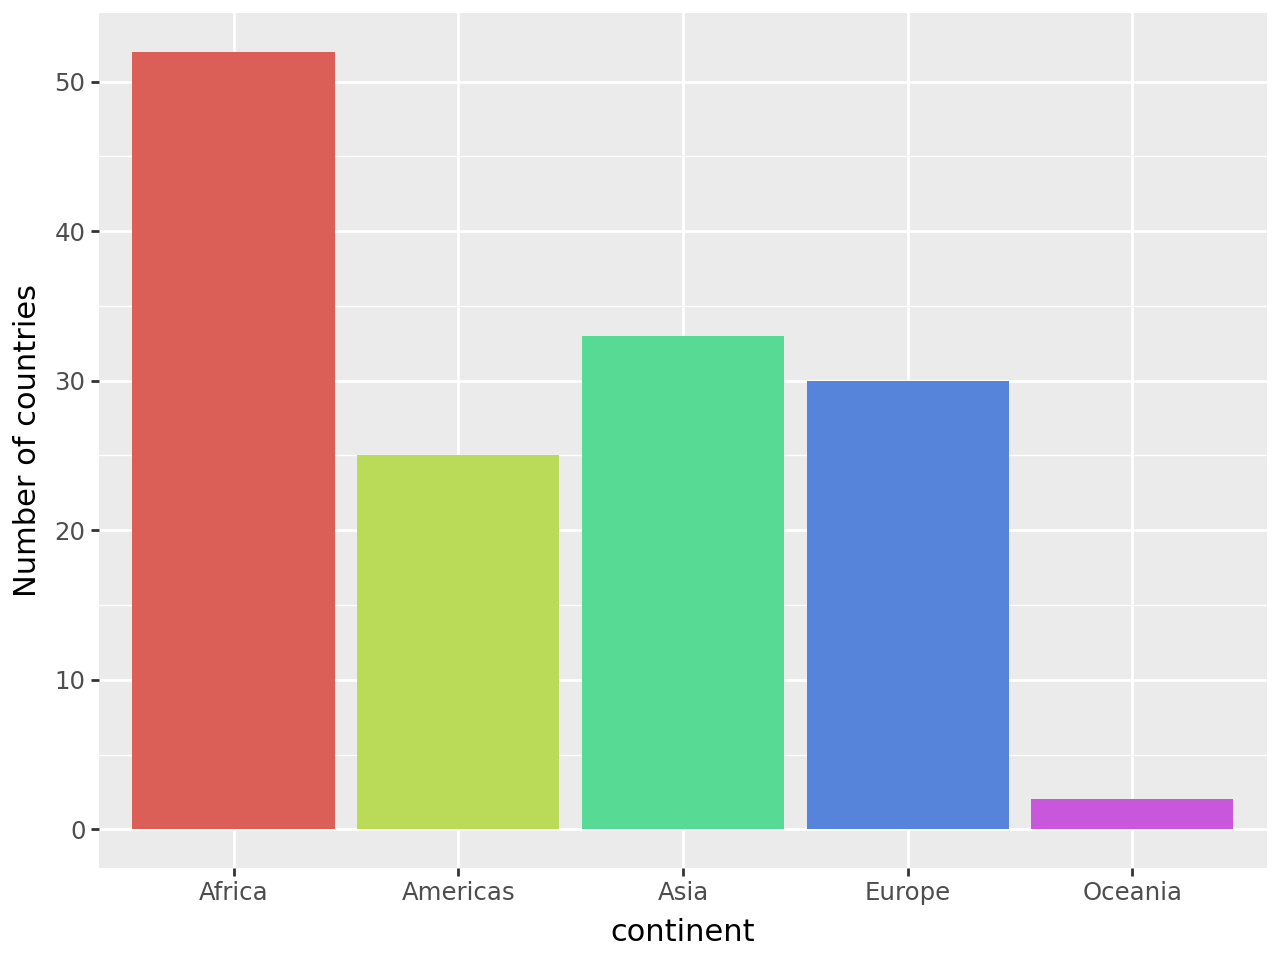

In [ ]:
mybar

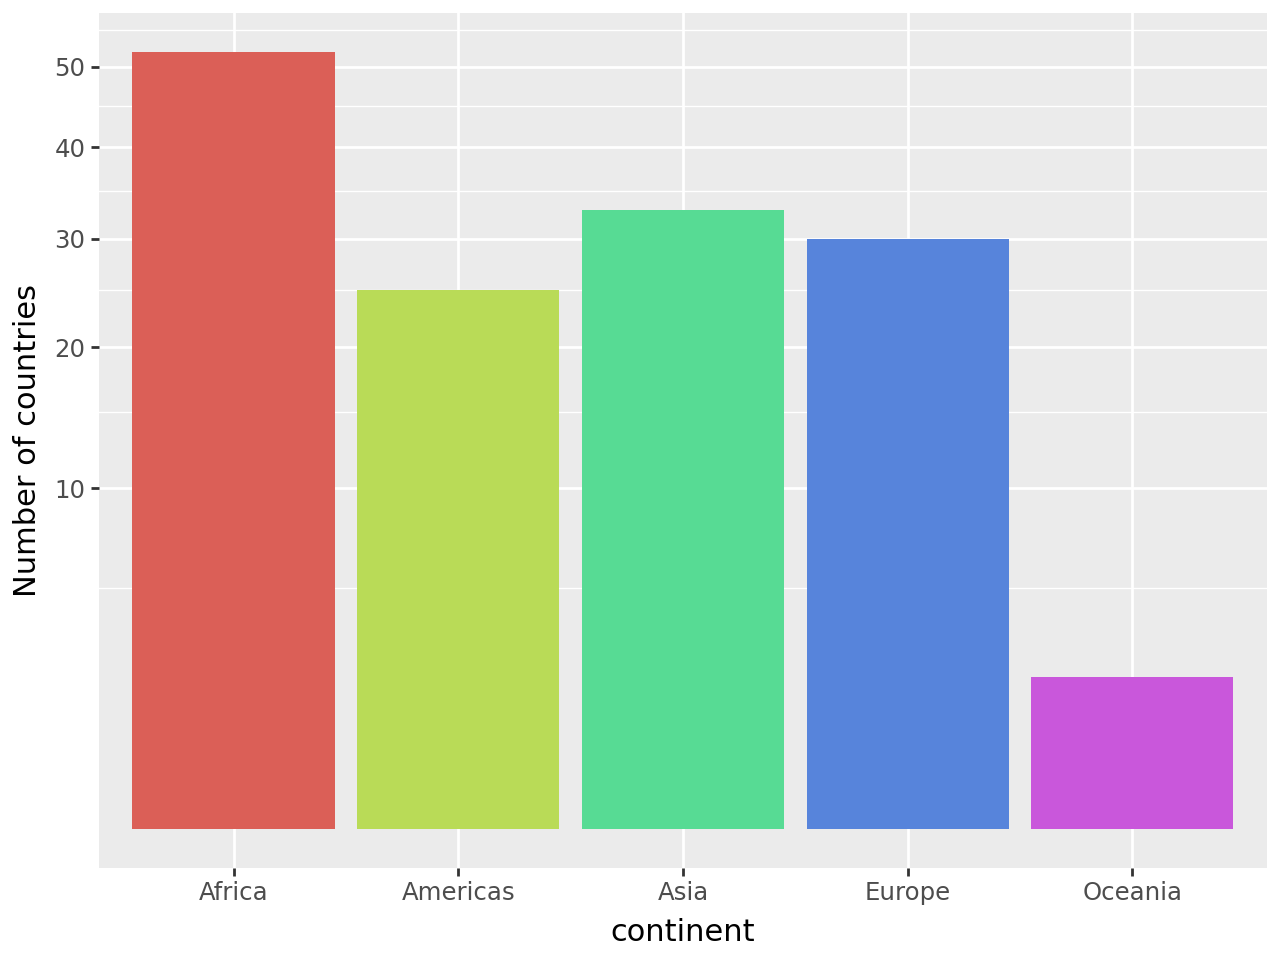

In [ ]:
mybar + coord_trans(y="sqrt") #transform the scale by sqrt

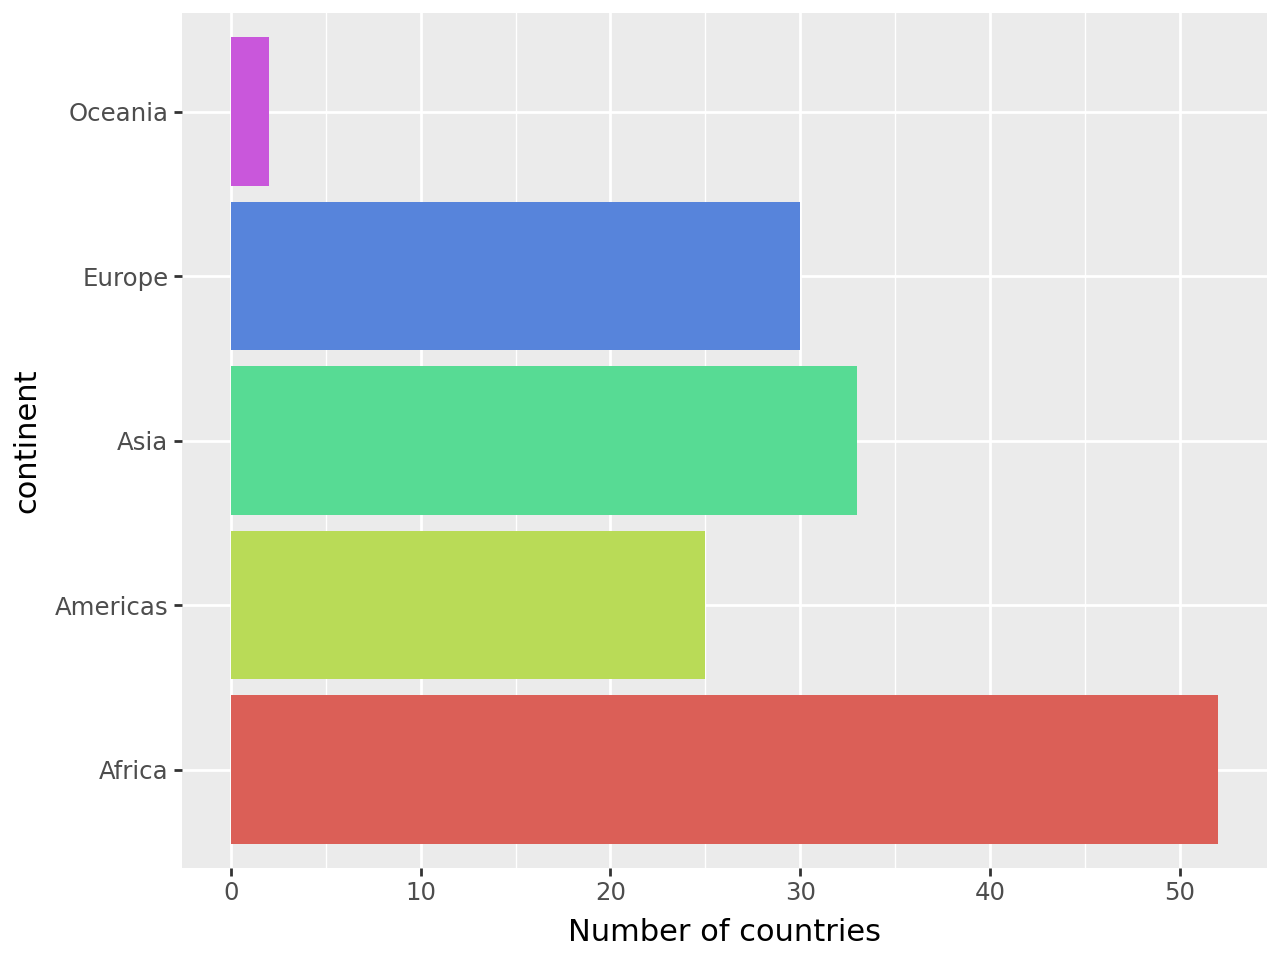

In [ ]:
mybar + coord_flip()  #flip axis

1D plots: density plots for continuous variables

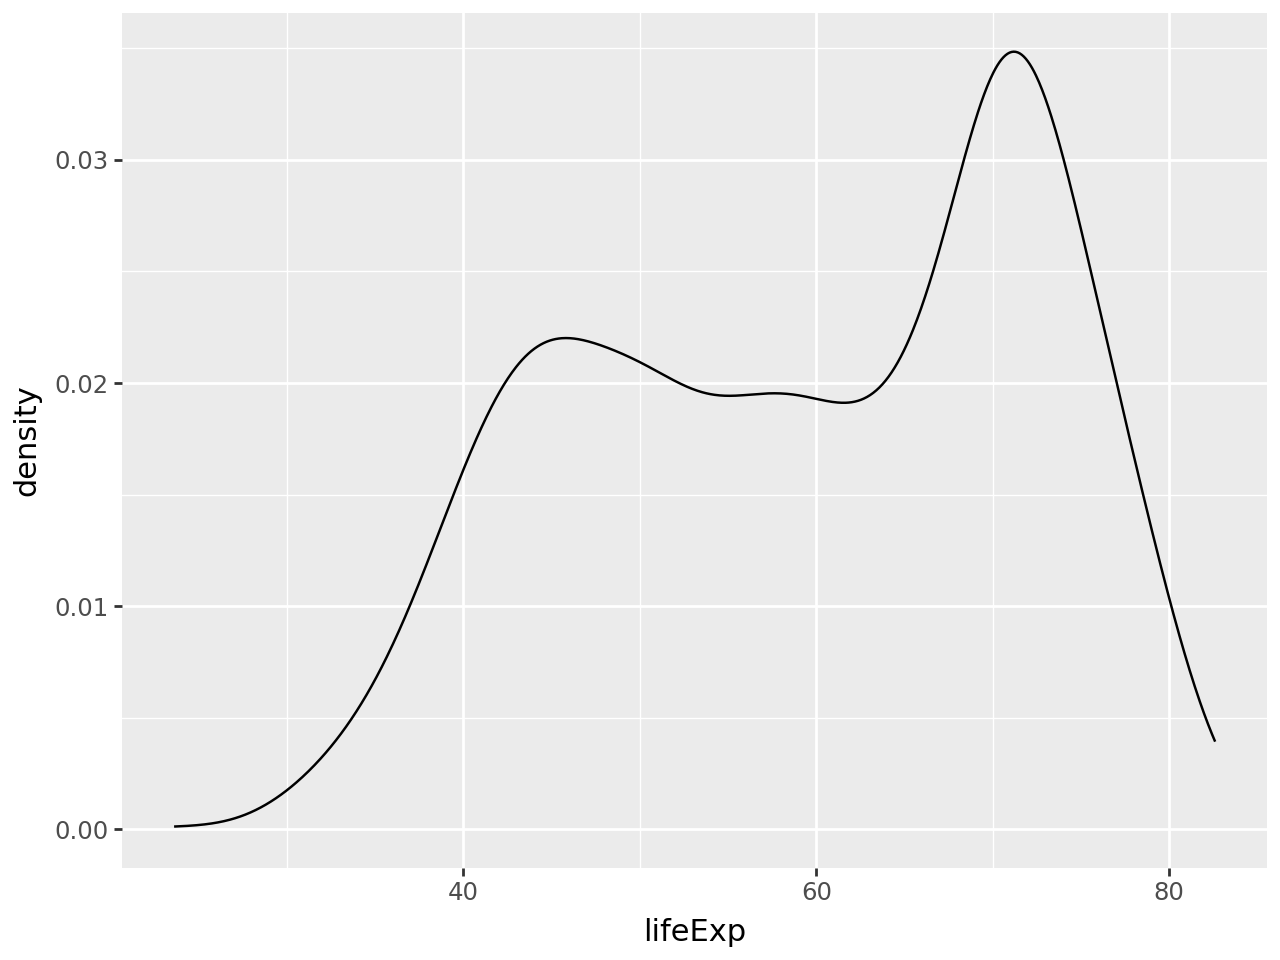

In [ ]:


(
  ggplot(gapminder, aes(x='lifeExp')) +
  geom_density()
)
# plotting the continuous variable lifeExp
# calculate and plot the smoothed frequency distribution of lifeExp

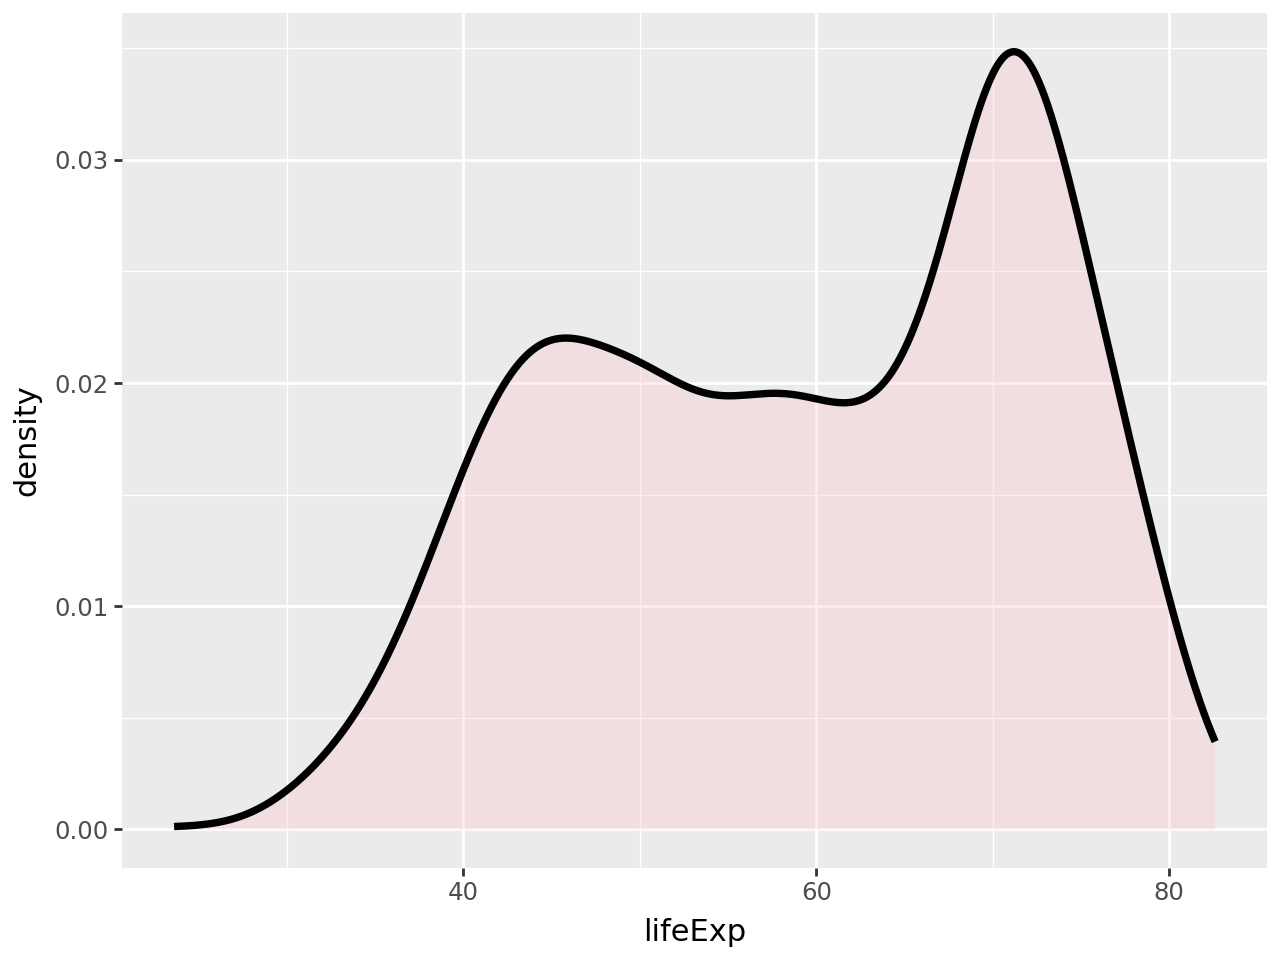

In [ ]:
(
  ggplot(gapminder, aes(x='lifeExp')) +
  geom_density(size=1.5, fill="pink", alpha=0.3) #add line thickness, fill color and set color transparency
)


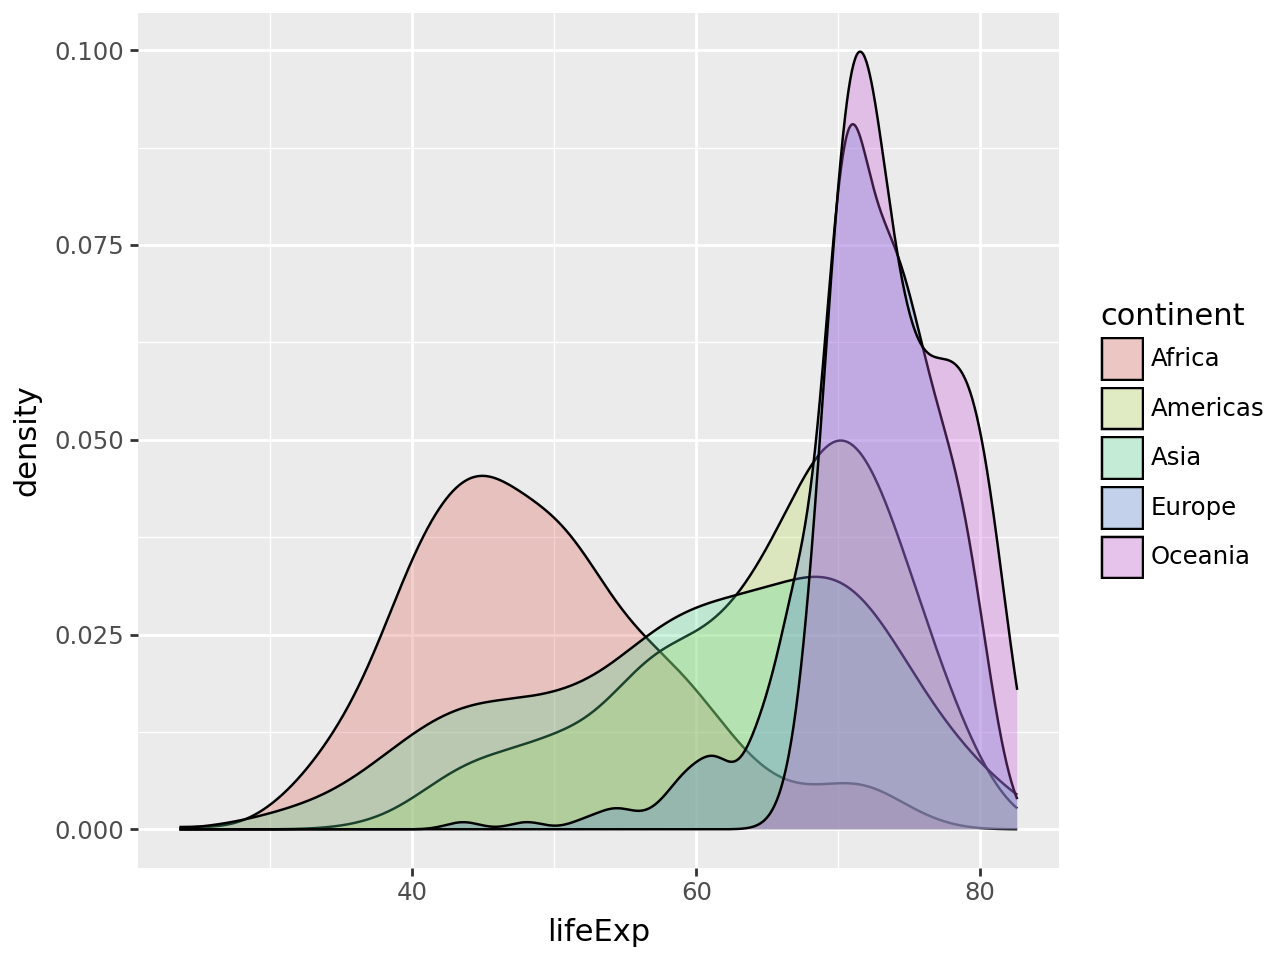

In [ ]:
(
  ggplot(gapminder, aes(x='lifeExp',fill='continent')) +
  geom_density(alpha=0.3) #add line thickness, fill color and set color transparency
)

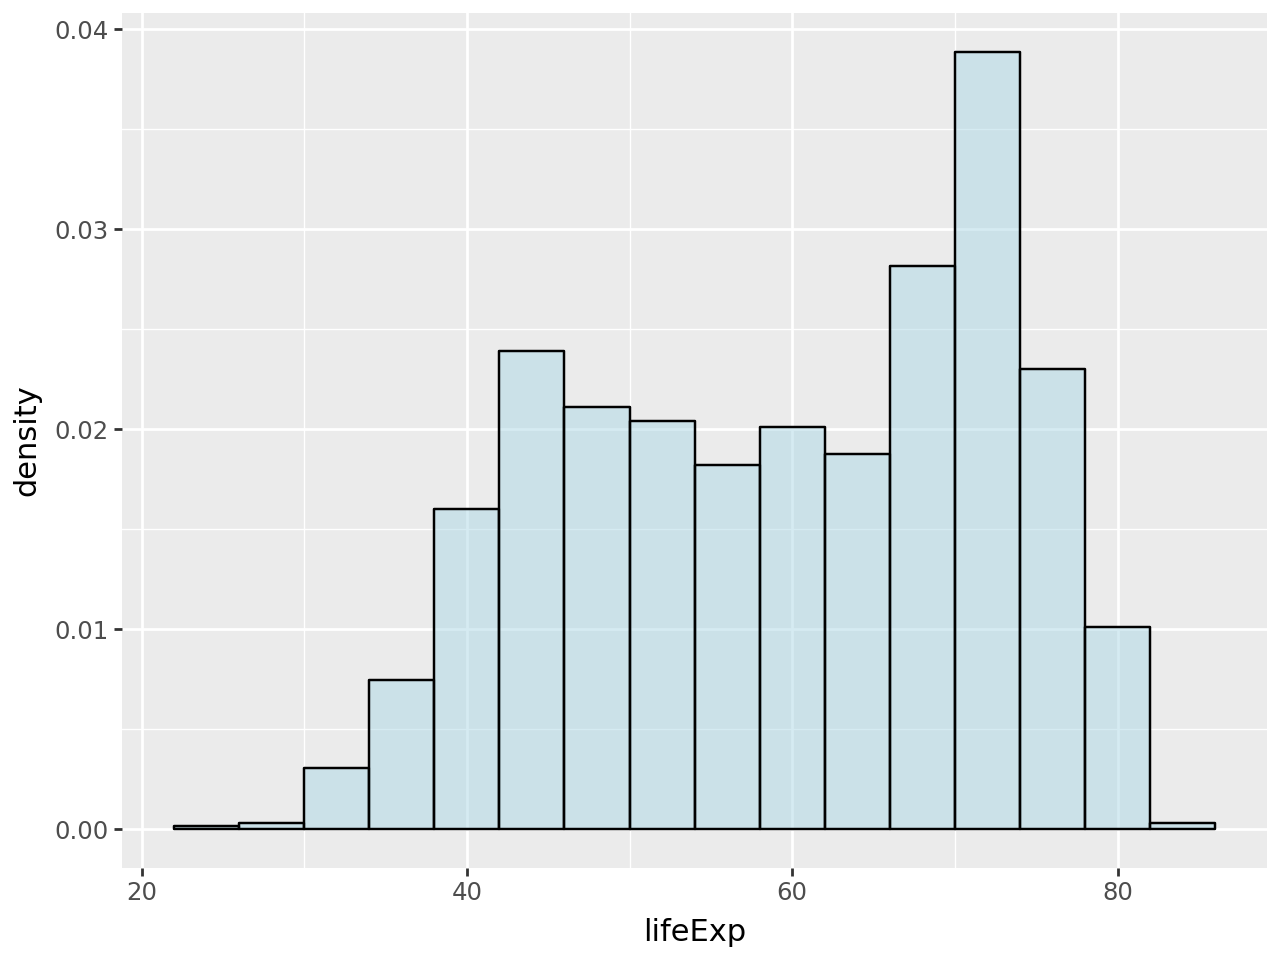

In [ ]:
(
  ggplot(gapminder, aes(x='lifeExp',y=after_stat("density"))) +
  geom_histogram( binwidth=4, color="black", fill="lightblue", alpha=0.5) # using histogram
)

boxplots and other visual summaries

In [ ]:
gap1 = ggplot(gapminder, aes(x="continent", y="lifeExp", fill="continent"))
#change the aesthetic to show continent on one axis, and life expectancy
# (lifeExp) on the other.

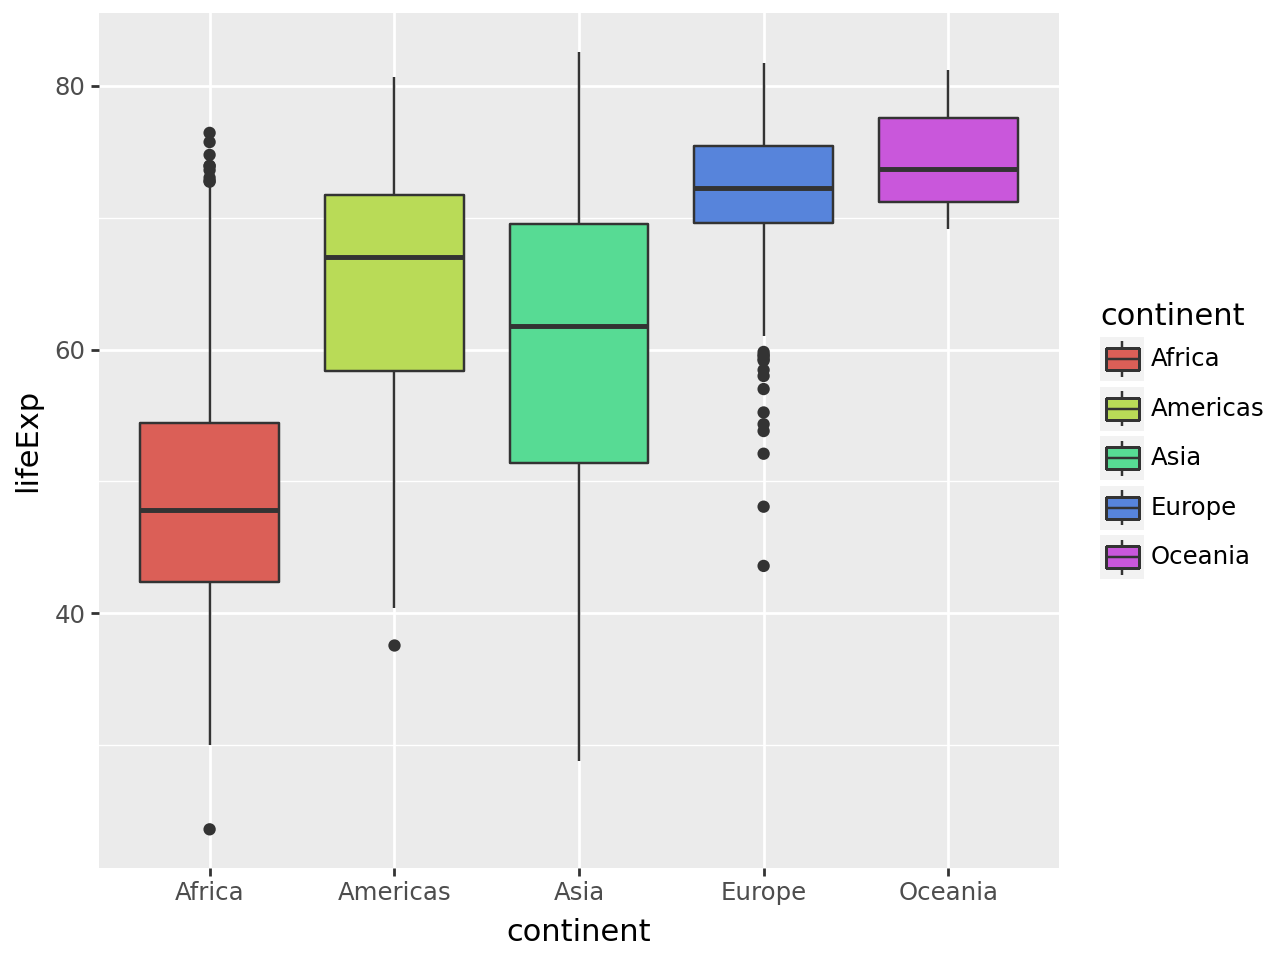

In [ ]:
gap1 + geom_boxplot()

#Challenge#

1. Make the plot horizontal

2. Instead of a boxplot, try geom_violin()

Looking at GDP

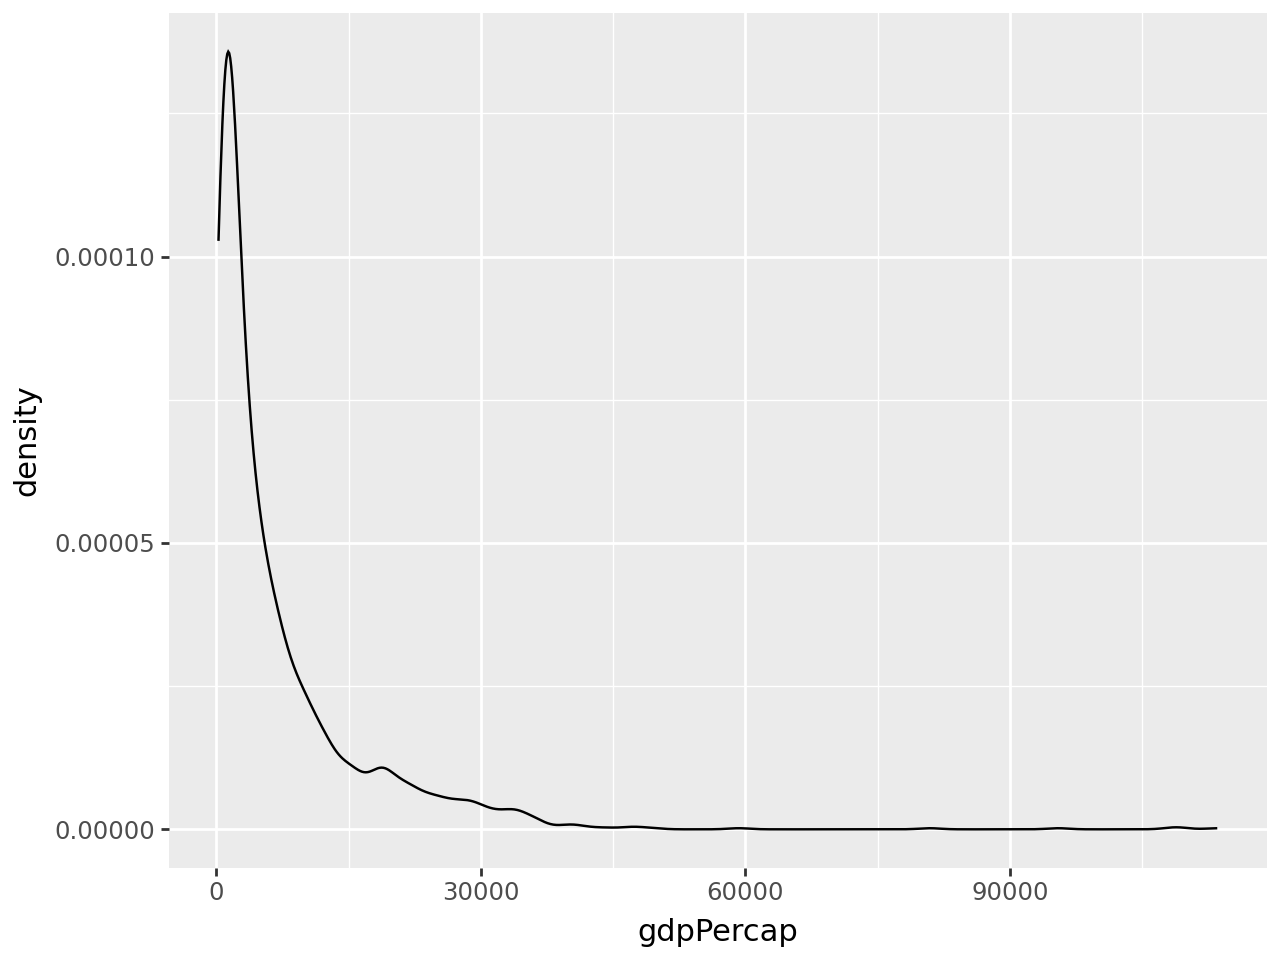

In [ ]:
(
    ggplot(gapminder, aes(x="gdpPercap")) +
    geom_density()
    # distribution of gdpPercap with the unconditional distribution
)

*YOUR TURN*

1. As we did for lifeExp plot the distributions separately for each continent

2.  plot GDP on a log scale (hint - use "log")

3. Make boxplots of gdpPercap by continent


1.5D: Layers & Time series plots

In [ ]:
# How life expectancy change with GDP per country?
# China for example
chinaGap = gapminder[gapminder["country"] == "China"]
china = (
 ggplot(chinaGap, aes(x="gdpPercap", y="lifeExp"))
)

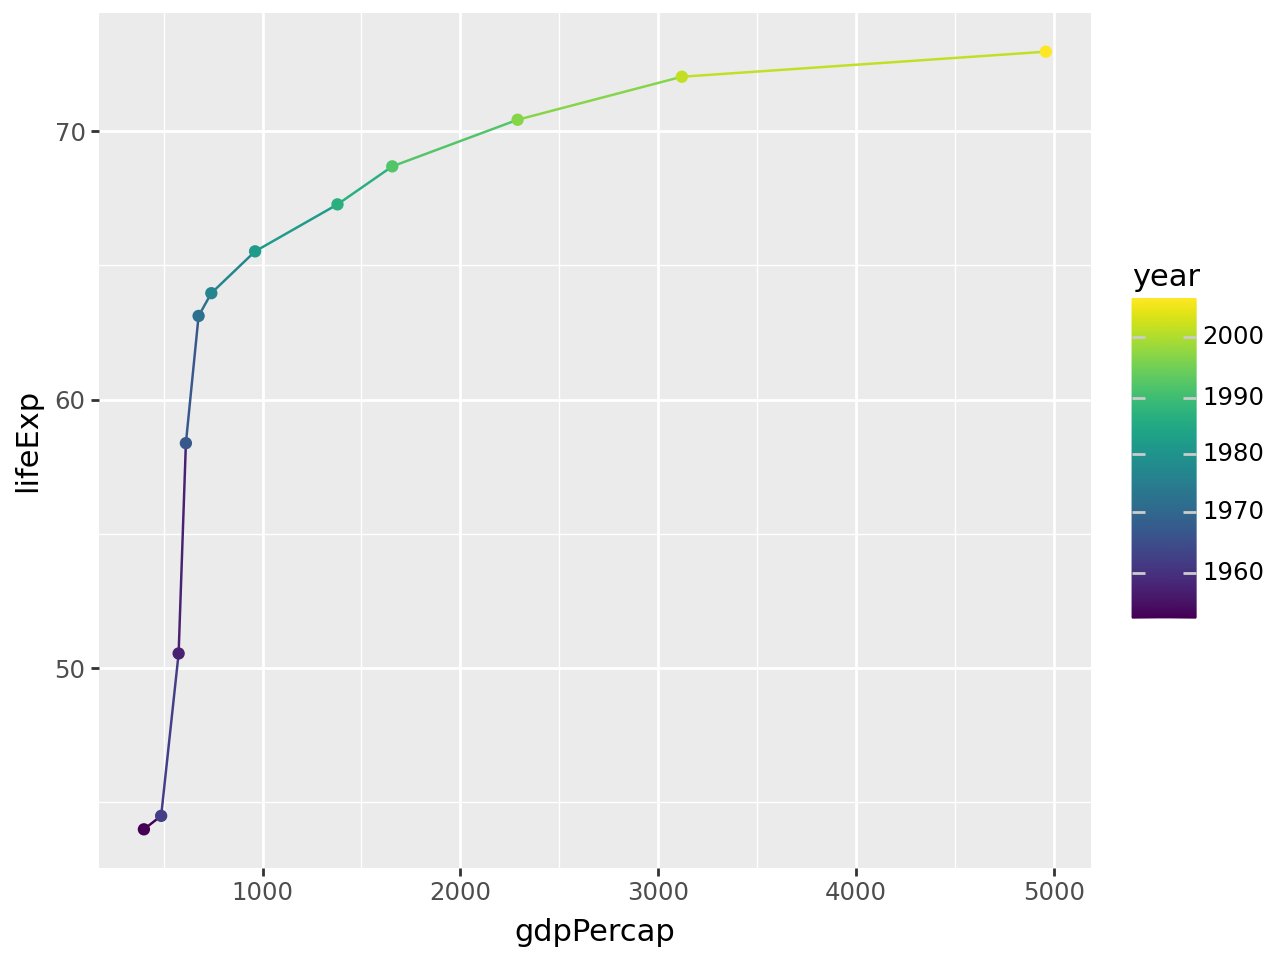

In [ ]:
china + geom_line() + geom_point() + aes(color="year")

In [ ]:
CIGap = gapminder[(gapminder["country"] == "China") | (gapminder["country"] == "India") ]
CI = (
 ggplot(CIGap, aes(x="gdpPercap", y="lifeExp",fill="country"))
)


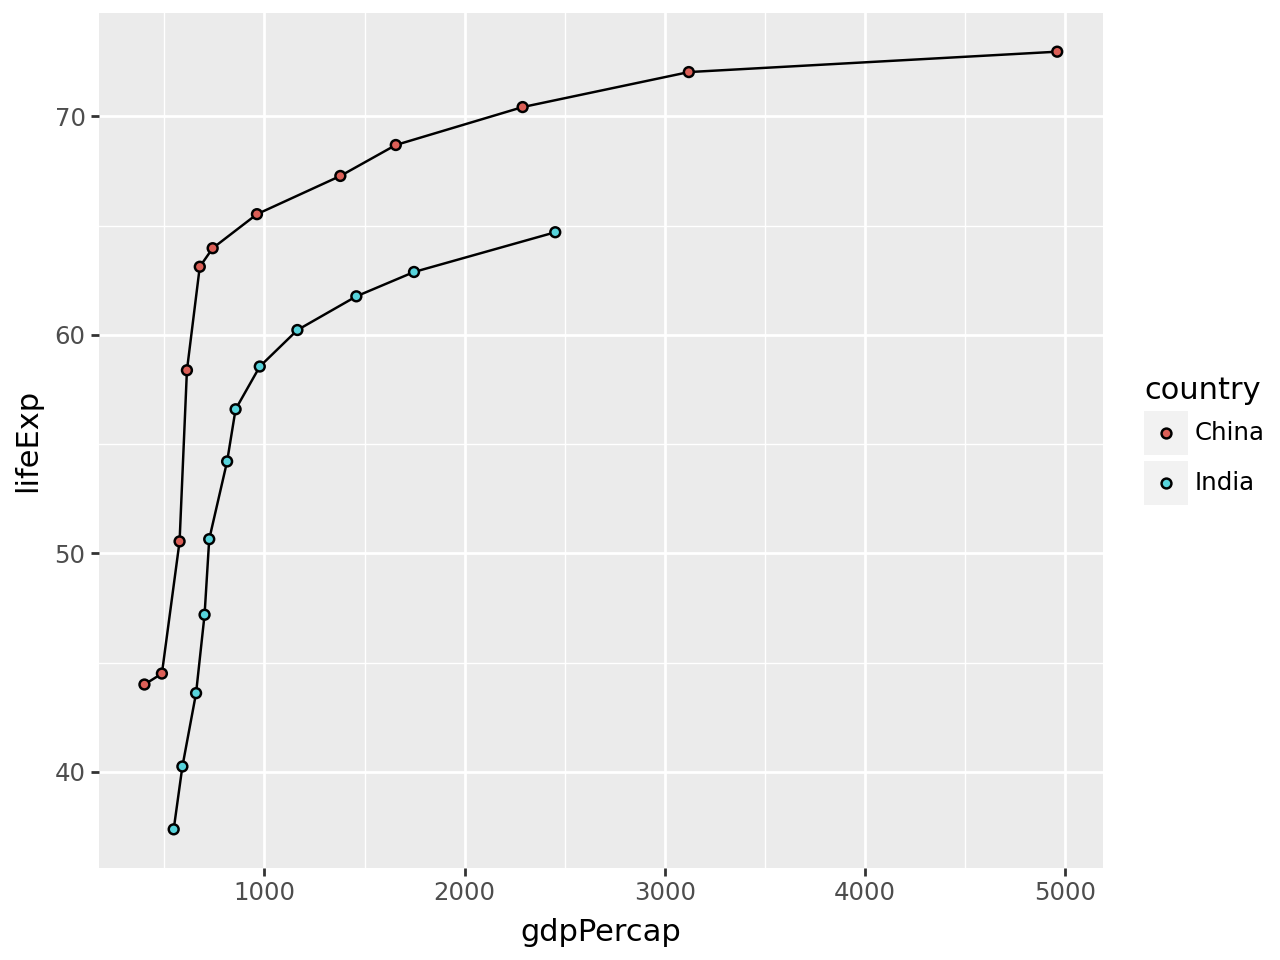

In [ ]:
CI + geom_line() + geom_point()

2D: Scatterplots

In [ ]:
gm_2007 = gapminder[gapminder["year"]==2007] #filtering data by picking those of 200
7

7

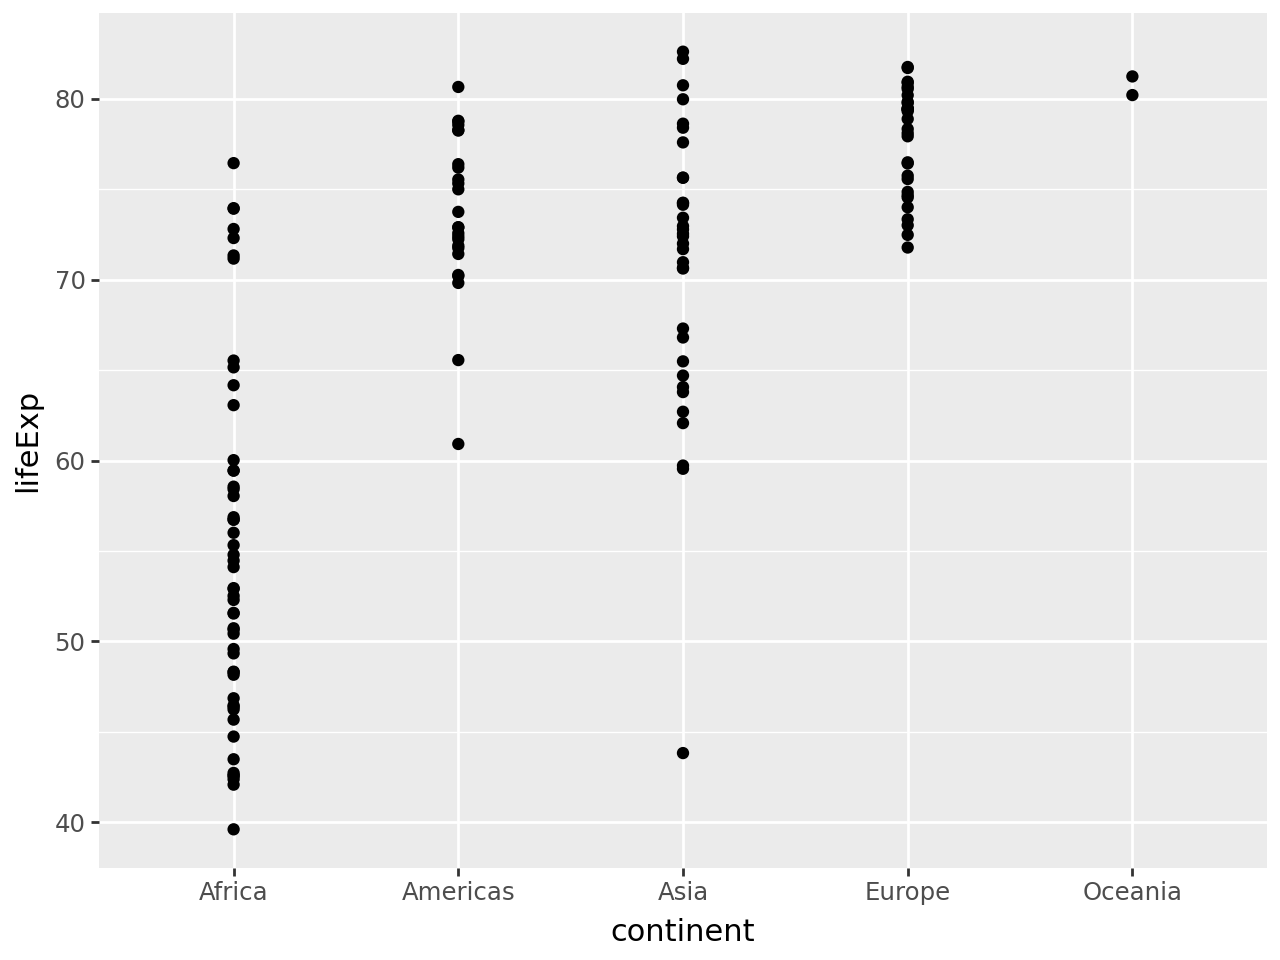

In [ ]:
(
  ggplot(gm_2007, aes(y="lifeExp", x="continent")) + geom_point()
)

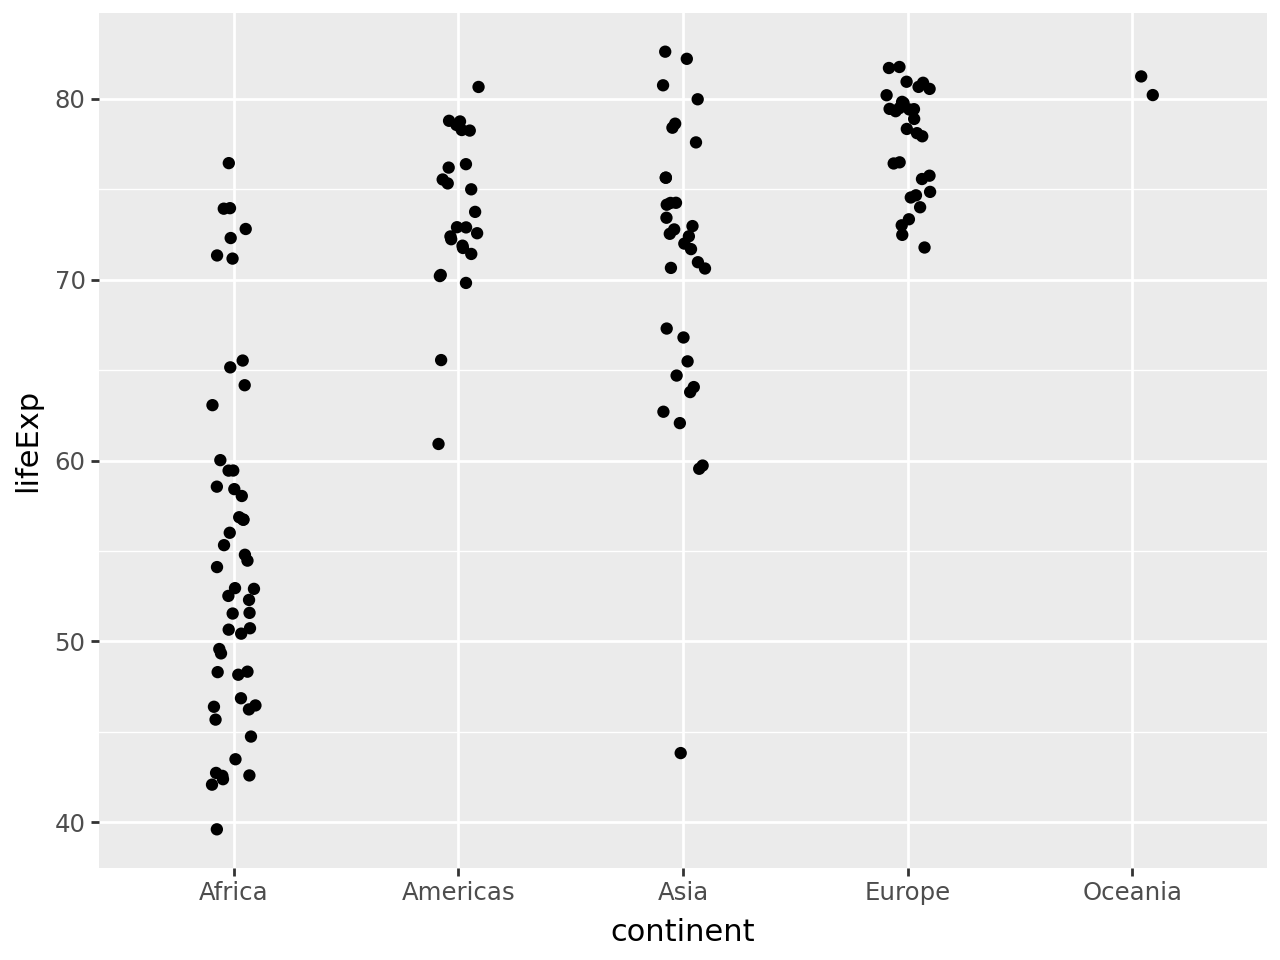

In [ ]:
(
  ggplot(gm_2007, aes(y="lifeExp", x="continent")) +
  geom_point(position=position_jitter(width=0.1, height=0)) #changing scale by jittering
)

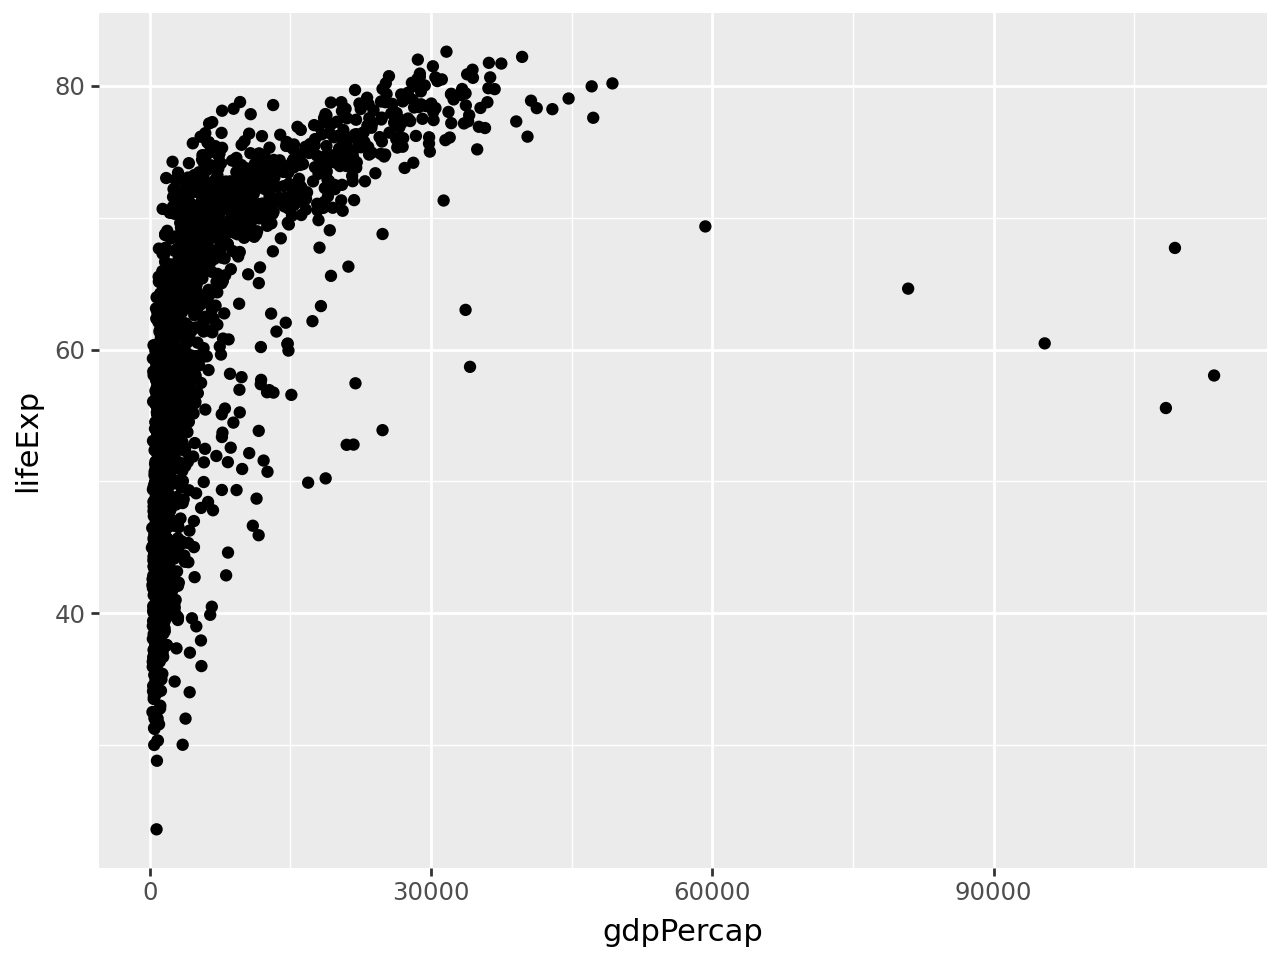

In [ ]:
plt = (
    ggplot(gapminder,aes(x="gdpPercap", y="lifeExp"))
)
plt + geom_point()

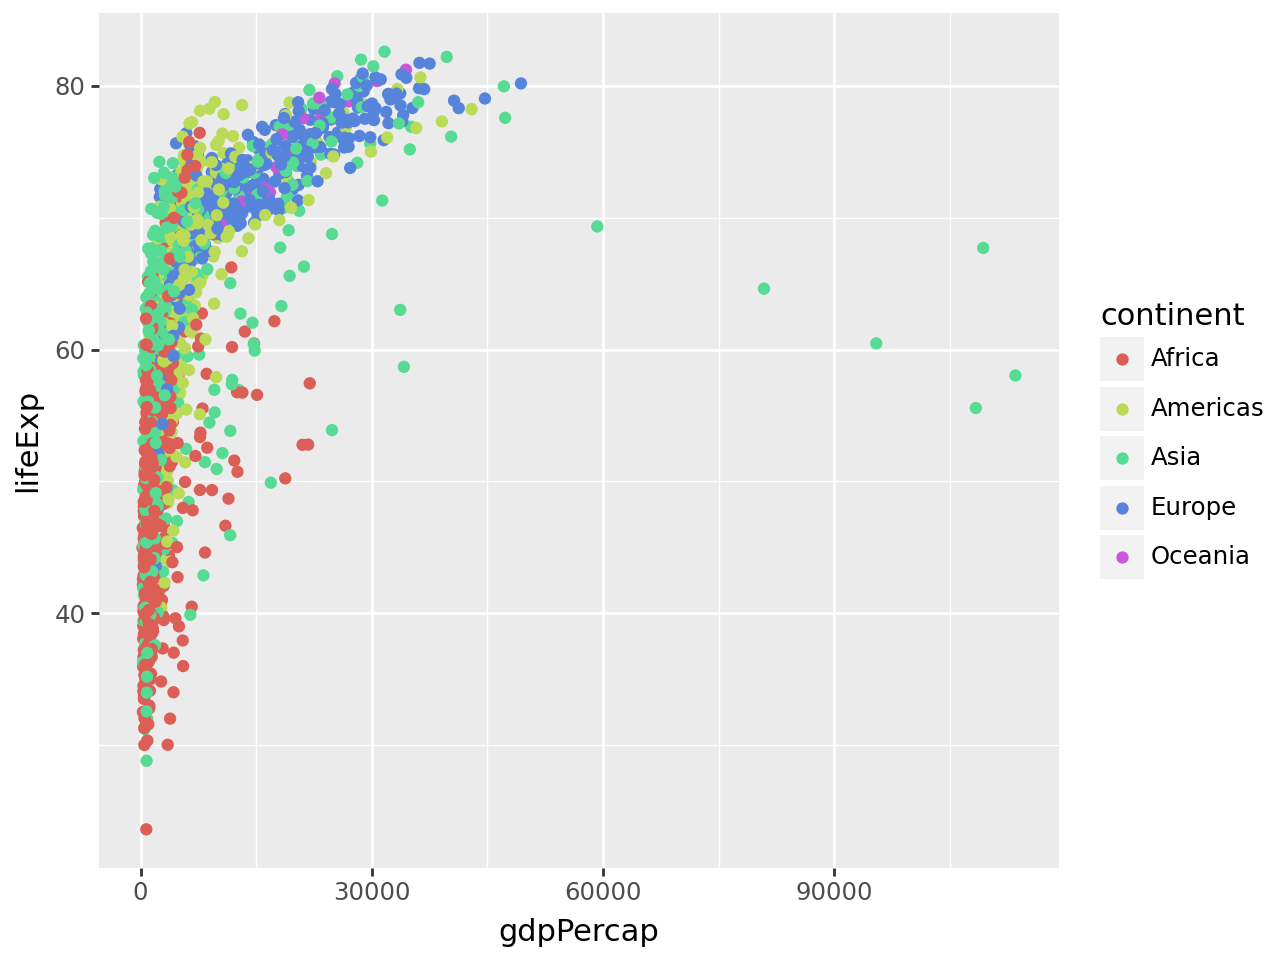

In [ ]:
plt + geom_point(aes(color="continent")) #adding color by continent

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


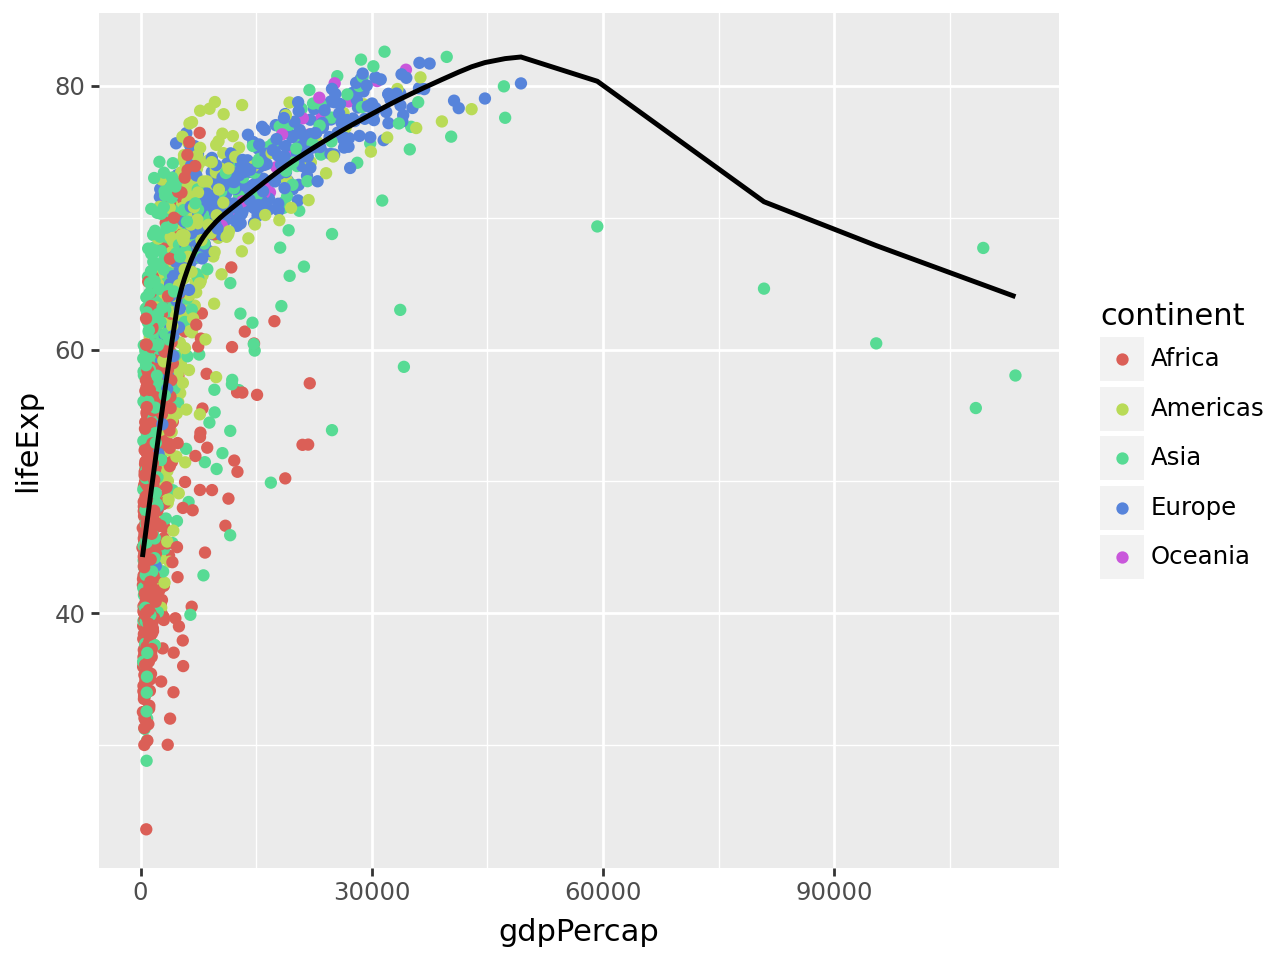

In [ ]:

(plt +
  geom_point(aes(color="continent")) +
  geom_smooth(method="lowess")
)


/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


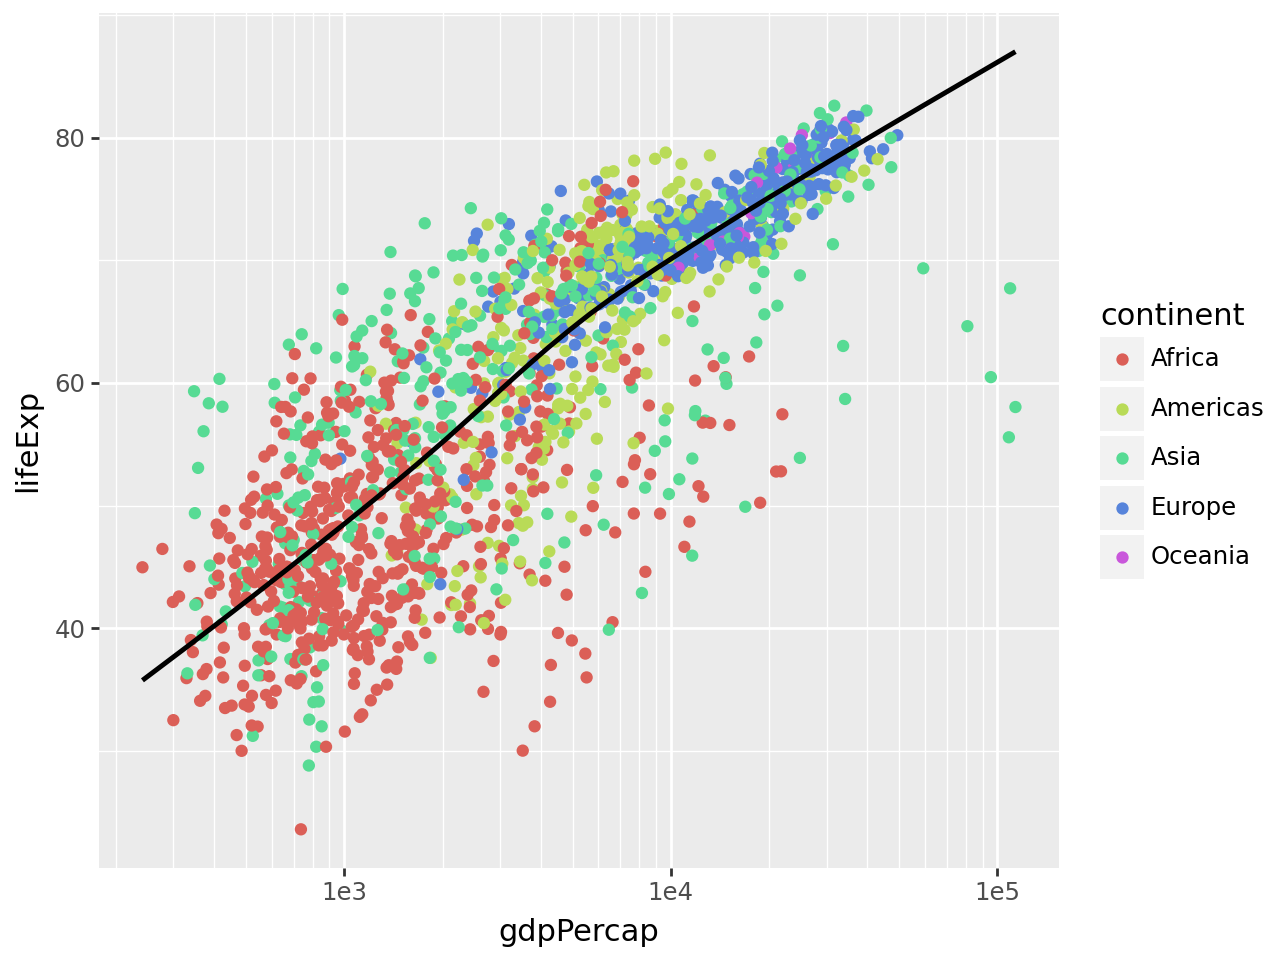

In [ ]:
(plt +
  geom_point(aes(color="continent")) +
  geom_smooth(method="lowess") +
  scale_x_log10()
)

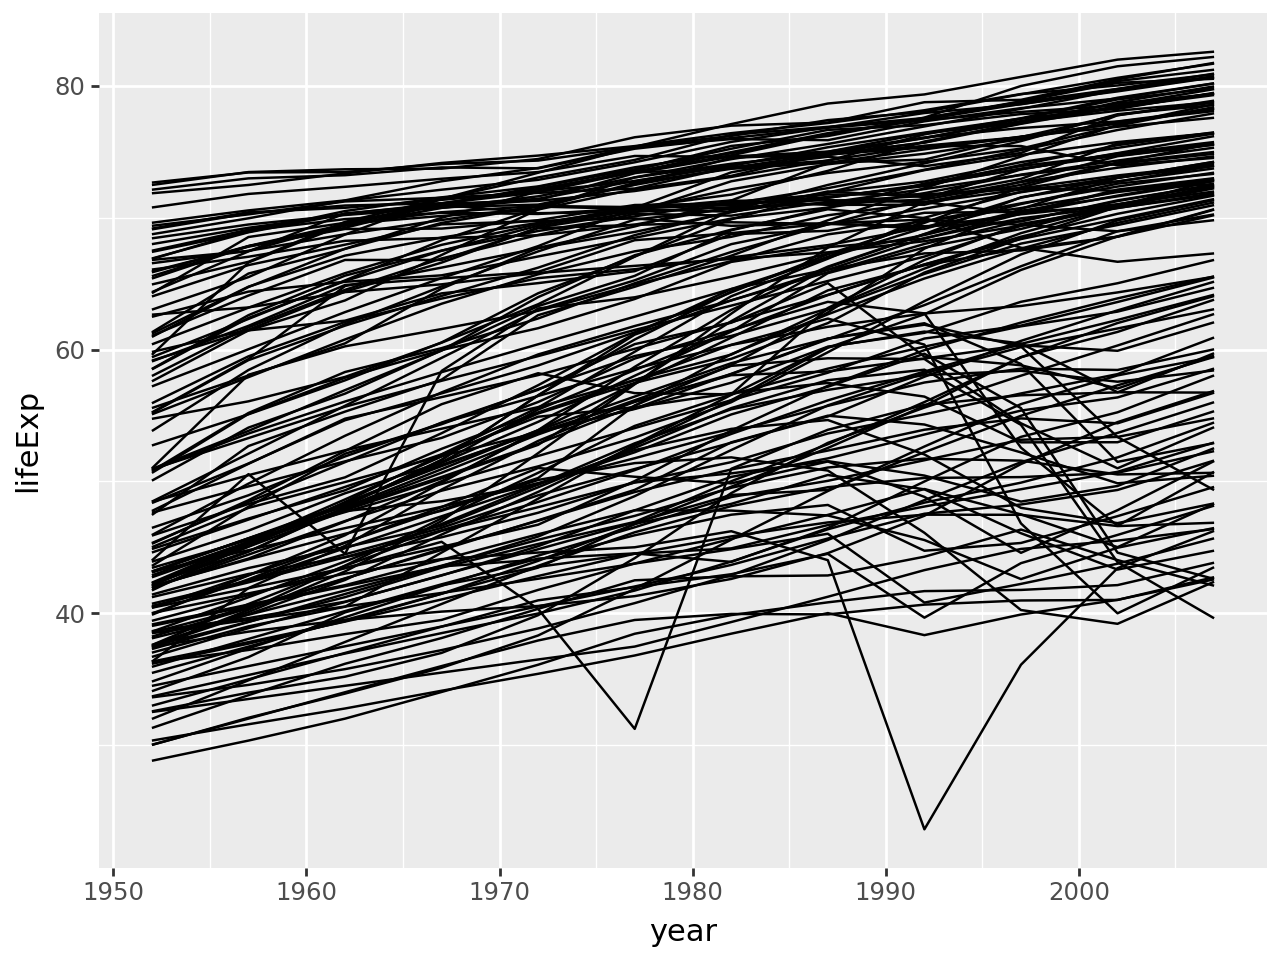